In [71]:
from car_data import bmws, priuses
from matplotlib import pyplot as plt
from math import exp, log


ImportError: cannot import name 'abs' from 'math' (/Users/viktorohad/anaconda3/lib/python3.11/lib-dynload/math.cpython-311-darwin.so)

In [ ]:
relevant_bmws = [(b.mileage, b.price, 1) for b in bmws]
relevant_priuses = [(b.mileage, b.price, 0) for b in priuses]
all_car_data = [
    *relevant_bmws,
    *relevant_priuses
]
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

In [ ]:
def bmw_finder(mileage, price):
    return 1 if price > 25000 else 0

In [ ]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage,price,is_bmw in data:
        if is_bmw == classifier(mileage, price):
            trues += 1
        else:
            falses += 1
    return trues / (trues + falses)

In [ ]:
test_classifier(bmw_finder, all_car_data)

0.59

Exercise 15.1: Update the test_classifier function to print the number of true positives, true negatives, false positives, and false negatives. Printing these for the bmw_finder classifier, what can you tell about the performance of the classifier?

In [ ]:
def test_classifier_print(classifier, data):
    trues = 0
    falses = 0
    for mileage,price,is_bmw in data:
        classification = classifier(mileage, price)
        if is_bmw == classification:
            trues += 1
            print("True positive")
        elif (is_bmw == 1) and classification == 0:
            falses += 1
            print("False negative")

        elif (is_bmw == 0) and classification == 1:
            trues += 1
            print("False positive")
        else:
            falses += 1
            print("True negative")
    return trues / (trues + falses)

In [ ]:
test_classifier_print(bmw_finder, all_car_data)

False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
True positive
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
True positive
False negative
False negative
True positive
False negative
False negative
False negative
False negative
False negative
False negative
False negative
True positive
False negative
True positive
True positive
True positive
True positive
False negative
False negative
False negative
False negative
False negative
False negative
Fal

0.59

In [ ]:
def test_classifier_refined(classifier, data, verbose=False):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0

    for mileage,price,is_bmw in data:
        prediction = classifier(mileage, price)
        if prediction and is_bmw:
            true_positives += 1
        elif prediction:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
    
    if verbose:
        print(f"""Data size: {len(data)}\nTrue positives: {true_positives}\nTrue negatives: {true_negatives}\nFalse positives: {false_positives}\nFalse negatives: {false_negatives}""")
    total = true_positives + true_negatives
    return total / len(data)

In [ ]:
test_classifier_refined(bmw_finder, all_car_data, verbose=True)

Data size: 200
True positives: 18
True negatives: 100
False positives: 0
False negatives: 82


0.59

Exercise 15.2: Find a way to update the bmw_finder function to improve its performance and use the test_classifier function to confirm that your improved function has better than 59% accuracy.

In [ ]:
test_classifier_refined(lambda m,p: 1 if m > 13000 and p > 18000 else 0, all_car_data, verbose=True)

Data size: 200
True positives: 62
True negatives: 97
False positives: 3
False negatives: 38


0.795

In [ ]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

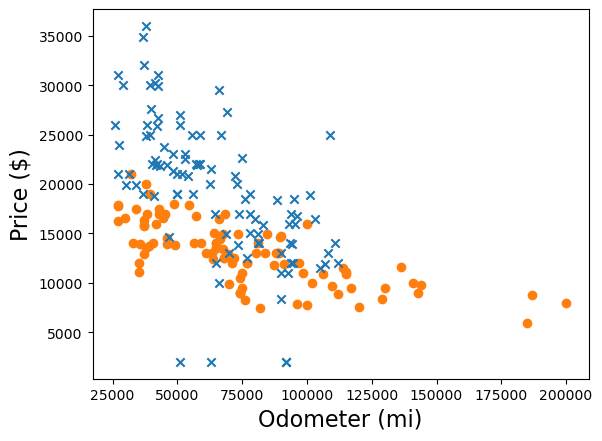

In [ ]:
plot_data(all_car_data)

In [ ]:
def decision_boundary_fn(mileage, price):
    return 1 if price > 21000 - 0.07 * mileage else 0

In [ ]:
test_classifier_refined(decision_boundary_fn, all_car_data, verbose=True)

Data size: 200
True positives: 73
True negatives: 88
False positives: 12
False negatives: 27


0.805

Exercise 15.3-Mini Project: What is the decision boundary of the form p = constant that gives the best classification accuracy on the test data set?

In [ ]:
def cutoff_price_classifier(cutoff_price):
    return lambda m,p: 1 if p > cutoff_price else 0

def cutoff_price_accuracy(cutoff_price):
    price_fn = cutoff_price_classifier(cutoff_price)
    return test_classifier_refined(price_fn, all_car_data)

all_prices = [car[1] for car in all_car_data]
most_accurate_cutoff_price = max(all_prices, key=cutoff_price_accuracy)


In [ ]:
test_classifier_refined(cutoff_price_classifier(most_accurate_cutoff_price), all_car_data, verbose=True)

Data size: 200
True positives: 62
True negatives: 97
False positives: 3
False negatives: 38


0.795

In [ ]:
def make_scale(data):
    min_val = min(data)
    max_val = max(data)

    scale = lambda x: (x - min_val) / (max_val - min_val)
    unscale = lambda y: y * (max_val - min_val) + min_val
    return scale, unscale

scale_price,unscale_price = make_scale([c[1] for c in all_car_data])
scale_milage,unscale_mileage = make_scale([c[0] for c in all_car_data])

print(f"Original price: {all_car_data[1][1]}")
print(f"Scaled down price example: {scale_price(all_car_data[1][1])}")
print(f"Unscaled down price example: {unscale_price(scale_price(all_car_data[1][1]))}")

Original price: 13995.0
Scaled down price example: 0.35265032227683435
Unscaled down price example: 13995.0


In [ ]:
scaled_car_data = [(scale_price(car[1]), scale_milage(car[0]),car[2]) for car in all_car_data]

In [ ]:
scaled_car_data

[(0.35276804897430614, 0.3873793103448276, 1),
 (0.35265032227683435, 0.4878735632183908, 1),
 (0.3522677105100509, 0.39156896551724135, 1),
 (0.37042705359507905, 0.11941379310344828, 1),
 (0.6029667127762899, 0.1557816091954023, 1),
 (0.6764870353474409, 0.1882816091954023, 1),
 (0.6749860199546752, 0.47595402298850575, 1),
 (0.35265032227683435, 0.31666666666666665, 1),
 (0.18798010418812727, 0.367816091954023, 1),
 (0.38208199664478915, 0.2449022988505747, 1),
 (0.29378697354092476, 0.39080459770114945, 1),
 (0.26435529917296996, 0.382183908045977, 1),
 (0.29378697354092476, 0.4947183908045977, 1),
 (0.2792182947287871, 0.4547183908045977, 1),
 (0.0, 0.3793103448275862, 1),
 (0.32333637460635134, 0.4709942528735632, 1),
 (0.4998086941166083, 0.1724137931034483, 1),
 (0.4970126850516526, 0.432132183908046, 1),
 (0.44103364040380255, 0.22048850574712645, 1),
 (0.23507078317685492, 0.22988505747126436, 1),
 (0.3086499690967419, 0.291235632183908, 1),
 (0.41151367101274394, 0.385143678

In [ ]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [ ]:
sigmoid(999), sigmoid(-12),sigmoid(0)

(1.0, 6.144174602214718e-06, 0.5)

In [ ]:
def make_logistic(a,b,c):
    return lambda x,p: sigmoid(a*x + b*c - p)

In [ ]:
def simple_logistic_cost(a,b,c):
    logistic_fn = make_logistic(a,b,c)
    errors = [abs(is_bmw - logistic_fn(m,p)) for m,p,is_bmw in scaled_car_data]
    return sum(errors)

In [ ]:
simple_logistic_cost(0.5, 0.2,0.4)

96.2404573597805

In [ ]:
def point_cost(logistic_fn, x,p,is_bmw):
    wrong_answer = 1 - is_bmw
    return -log(abs(wrong_answer - logistic_fn(x,p)))

def logistic_cost(a,b,c):
    logistic_fn = make_logistic(a,b,c)
    errors = [point_cost(logistic_fn, m,p,is_bmw) for m,p,is_bmw in scaled_car_data]
    return sum(errors)